# 🏠 Problem Definition
# 🎯 Objective: 
# The goal is to determine the air quality condition based on various environmental parameters.

# 📌 This is a regression problem, where the objective is to use a machine learning model to predict the exact air quality status given new input parameters.


In [1]:
# Data Collection
import pandas as pd
import numpy as np

#Vizualizatsiya
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer

# Ma'lumotni bo'lish va modelni sozlash 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold

# Regressiya modellarini chaqirish 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Model Evaluation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Model tushuntiruvchiligini aniqlash (SHAP) 
import shap  




c:\Users\Rasulbek_Ruzmetov\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df = pd.read_csv('AirQualityUCI.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'AirQualityUCI.csv'

In [7]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


# 📊 Data Overview

### 🧮 Dataset o‘lchami:
- **283,901 ta qator**
- **46 ta ustun**

### 🧹 Tozalash holati:
- Ma’lumotlar **to‘liq toza**
- Faqat **`Lng`** ustunida **1 ta null qiymat** mavjud

### 🔢 Ustunlar tipi:
- Aksariyat ustunlar — **raqamli (`float64`)**
- Ko‘pchiligi **one-hot encoded** holatida


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             283901 non-null  int64  
 1   Lng                    283900 non-null  float64
 2   Lat                    283901 non-null  float64
 3   tradeTime              283901 non-null  int64  
 4   followers              283901 non-null  float64
 5   totalPrice             283901 non-null  float64
 6   square                 283901 non-null  float64
 7   livingRoom             283901 non-null  float64
 8   drawingRoom            283901 non-null  float64
 9   kitchen                283901 non-null  float64
 10  bathRoom               283901 non-null  float64
 11  constructionTime       283901 non-null  float64
 12  ladderRatio            283901 non-null  float64
 13  fiveYearsProperty      283901 non-null  float64
 14  subway                 283901 non-nu

In [5]:
df["Unnamed: 0"].unique()


array([     0,      1,      3, ..., 318847, 318848, 318849], dtype=int64)

# 🔢 Ustun faqat qator raqamini bildiradi.
### 🏠💸 Uy narxiga ta’sir qiluvchi real ma’lumotlarni o‘z ichiga olmaydi.


In [6]:
df = df.drop(columns=["Unnamed: 0"])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Lng                    283900 non-null  float64
 1   Lat                    283901 non-null  float64
 2   tradeTime              283901 non-null  int64  
 3   followers              283901 non-null  float64
 4   totalPrice             283901 non-null  float64
 5   square                 283901 non-null  float64
 6   livingRoom             283901 non-null  float64
 7   drawingRoom            283901 non-null  float64
 8   kitchen                283901 non-null  float64
 9   bathRoom               283901 non-null  float64
 10  constructionTime       283901 non-null  float64
 11  ladderRatio            283901 non-null  float64
 12  fiveYearsProperty      283901 non-null  float64
 13  subway                 283901 non-null  float64
 14  communityAverage       283901 non-nu

## ⚠️ Ustun nomlaridagi maxsus belgilar haqida

Ba’zi ustun nomlarida **xitoycha belgilar** mavjud (`低`, `底`, `顶`, `高`, `未知` kabi).

🚫 Bu belgilar **LightGBM** va **XGBoost** kabi modellar bilan ishlaganda **xatolarga olib kelishi mumkin**.

✅ Shuning uchun **ustun nomlarini tozalash** yoki **o‘zgartirish** tavsiya etiladi.


In [8]:
df.columns

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime',
       'ladderRatio', 'fiveYearsProperty', 'subway', 'communityAverage',
       'floor_height', 'renovationCondition_2', 'renovationCondition_3',
       'renovationCondition_4', 'buildingStructure_2', 'buildingStructure_3',
       'buildingStructure_4', 'buildingStructure_5', 'buildingStructure_6',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'district_2', 'district_3', 'district_4', 'district_5', 'district_6',
       'district_7', 'district_8', 'district_9', 'district_10', 'district_11',
       'district_12', 'district_13', 'elevator_1.0', 'floor_type_低',
       'floor_type_底', 'floor_type_未知', 'floor_type_顶', 'floor_type_高'],
      dtype='object')

In [9]:
df.rename(columns={
    'floor_type_低': 'floor_type_low',
    'floor_type_底': 'floor_type_bottom',
    'floor_type_高': 'floor_type_high',
    'floor_type_顶': 'floor_type_top',
    'floor_type_未知': 'floor_type_unknown'
}, inplace=True)


In [10]:
df.columns

Index(['Lng', 'Lat', 'tradeTime', 'followers', 'totalPrice', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'constructionTime',
       'ladderRatio', 'fiveYearsProperty', 'subway', 'communityAverage',
       'floor_height', 'renovationCondition_2', 'renovationCondition_3',
       'renovationCondition_4', 'buildingStructure_2', 'buildingStructure_3',
       'buildingStructure_4', 'buildingStructure_5', 'buildingStructure_6',
       'buildingType_2.0', 'buildingType_3.0', 'buildingType_4.0',
       'district_2', 'district_3', 'district_4', 'district_5', 'district_6',
       'district_7', 'district_8', 'district_9', 'district_10', 'district_11',
       'district_12', 'district_13', 'elevator_1.0', 'floor_type_low',
       'floor_type_bottom', 'floor_type_unknown', 'floor_type_top',
       'floor_type_high'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Lng                    283900 non-null  float64
 1   Lat                    283901 non-null  float64
 2   tradeTime              283901 non-null  int64  
 3   followers              283901 non-null  float64
 4   totalPrice             283901 non-null  float64
 5   square                 283901 non-null  float64
 6   livingRoom             283901 non-null  float64
 7   drawingRoom            283901 non-null  float64
 8   kitchen                283901 non-null  float64
 9   bathRoom               283901 non-null  float64
 10  constructionTime       283901 non-null  float64
 11  ladderRatio            283901 non-null  float64
 12  fiveYearsProperty      283901 non-null  float64
 13  subway                 283901 non-null  float64
 14  communityAverage       283901 non-nu

In [12]:
df.isnull().sum()

Lng                      1
Lat                      0
tradeTime                0
followers                0
totalPrice               0
square                   0
livingRoom               0
drawingRoom              0
kitchen                  0
bathRoom                 0
constructionTime         0
ladderRatio              0
fiveYearsProperty        0
subway                   0
communityAverage         0
floor_height             0
renovationCondition_2    0
renovationCondition_3    0
renovationCondition_4    0
buildingStructure_2      0
buildingStructure_3      0
buildingStructure_4      0
buildingStructure_5      0
buildingStructure_6      0
buildingType_2.0         0
buildingType_3.0         0
buildingType_4.0         0
district_2               0
district_3               0
district_4               0
district_5               0
district_6               0
district_7               0
district_8               0
district_9               0
district_10              0
district_11              0
d

In [13]:
if df['Lng'].isnull().any():
    df['Lng'] = df['Lng'].fillna(df['Lng'].mean())


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Lng                    283901 non-null  float64
 1   Lat                    283901 non-null  float64
 2   tradeTime              283901 non-null  int64  
 3   followers              283901 non-null  float64
 4   totalPrice             283901 non-null  float64
 5   square                 283901 non-null  float64
 6   livingRoom             283901 non-null  float64
 7   drawingRoom            283901 non-null  float64
 8   kitchen                283901 non-null  float64
 9   bathRoom               283901 non-null  float64
 10  constructionTime       283901 non-null  float64
 11  ladderRatio            283901 non-null  float64
 12  fiveYearsProperty      283901 non-null  float64
 13  subway                 283901 non-null  float64
 14  communityAverage       283901 non-nu

In [15]:
df.describe(include='all')

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,...,district_10,district_11,district_12,district_13,elevator_1.0,floor_type_low,floor_type_bottom,floor_type_unknown,floor_type_top,floor_type_high
count,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,...,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000
mean,0.542672,0.515713,2014.742414,0.014596,314.666440,0.159445,0.245836,0.229752,0.331239,0.164561,...,0.093152,0.042501,0.005696,0.031159,0.556479,0.199168,0.080859,0.003297,0.121821,0.218964
std,0.176360,0.148571,1.659689,0.030155,149.120619,0.069397,0.092119,0.100170,0.033659,0.054527,...,0.290646,0.201729,0.075254,0.173747,0.496801,0.399375,0.272619,0.057324,0.327079,0.413545
min,0.000000,0.000000,2002.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.426675,0.423443,2013.000000,0.000000,201.000000,0.110650,0.125000,0.200000,0.333333,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.538907,0.490697,2015.000000,0.004374,285.000000,0.142557,0.250000,0.200000,0.333333,0.142857,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.634317,0.605344,2016.000000,0.015748,401.000000,0.194051,0.250000,0.200000,0.333333,0.142857,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2018.000000,1.000000,762.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 📊 totalPrice bilan bog‘liqlik (korrelyatsiya) tahlili

Ushbu qadamda:

- Faqat **raqamli ustunlar** (`numeric`) tanlab olinadi.
- `totalPrice` bilan **korrelyatsiyasi** hisoblanadi.
- Har bir ustunning `totalPrice` bilan bog‘liqlik darajasi **saralab (sort)** chiqiladi.
- Natija **heatmap** orqali vizual tarzda tasvirlanadi.

🎯 Maqsad — qaysi ustunlar uy narxiga kuchli ta’sir qilayotganini aniqlash.


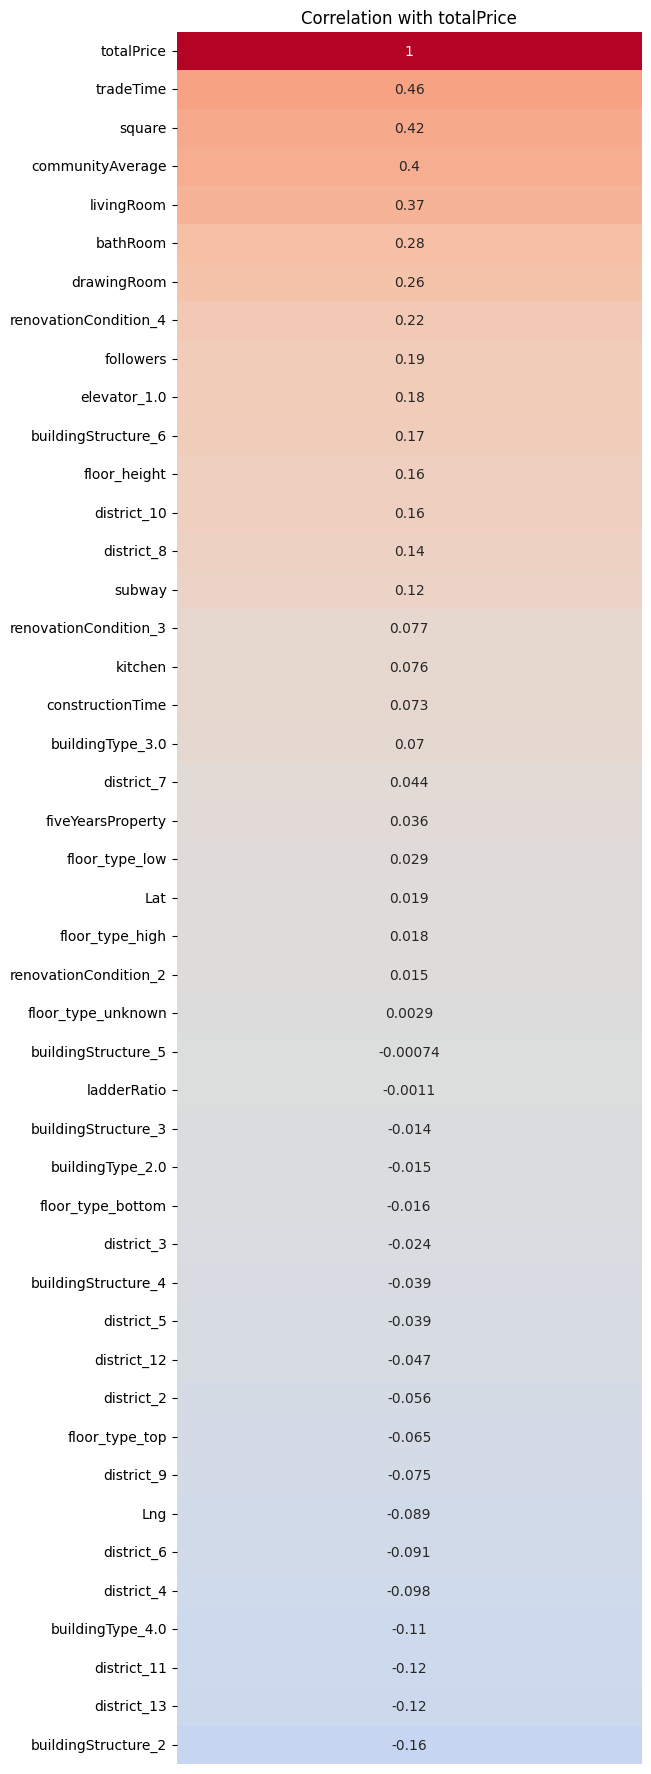

In [16]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['totalPrice'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with totalPrice')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()


In [17]:
# Korrelyatsiya > 0.25 bo‘lgan ustunlarni tanlash
important_features = corr_target[corr_target > 0.25].index.tolist()

# target ustunni olib tashlaymiz
important_features = [feat for feat in important_features if feat != 'totalPrice']

print("Muhim xususiyatlar:", important_features)


Muhim xususiyatlar: ['tradeTime', 'square', 'communityAverage', 'livingRoom', 'bathRoom', 'drawingRoom']


## ⚠️ Noto‘g‘ri yoki yo‘qolgan qiymatlarni aniqlash

- 🏠 **0 square metrli uy bo‘lmaydi** → `square = 0` noto‘g‘ri ma’lumot bo‘lishi mumkin.
- 🚿 **0 bathRoom yoki livingRoom** — bu turdagi uylar juda kam uchraydi → ehtimol qiymatlar yo‘q yoki noto‘g‘ri kiritilgan.
- ⚠️ Bunday qiymatlar modelga noto‘g‘ri o‘rganishga olib keladi va aniqlikni pasaytiradi.

✅ Yechim: bu qiymatlarni `NaN` ga almashtirib, **ustun o‘rtachasi bilan to‘ldirish (imputation)** tavsiya etiladi.


In [18]:
# 0 qiymatlar sonini tekshirish
ustunlar = ['tradeTime', 'square', 'communityAverage', 'livingRoom', 'bathRoom', 'drawingRoom']

for col in ustunlar:
    zero_count = (df[col] == 0).sum()
    print(f"{col} ustunida 0 qiymatlari soni: {zero_count}")


tradeTime ustunida 0 qiymatlari soni: 0
square ustunida 0 qiymatlari soni: 1
communityAverage ustunida 0 qiymatlari soni: 1
livingRoom ustunida 0 qiymatlari soni: 20
bathRoom ustunida 0 qiymatlari soni: 669
drawingRoom ustunida 0 qiymatlari soni: 17155


## 🔄 0 larni NaN qilib, o‘rtacha bilan to‘ldirish (imputation)


In [19]:
for col in ustunlar:
    df[col] = df[col].replace(0, np.nan)  
    df[col].fillna(df[col].mean(), inplace=True)  


C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_20320\3213471408.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [20]:
# 0 qiymatlar sonini tekshirish
ustunlar = ['tradeTime', 'square', 'communityAverage', 'livingRoom', 'bathRoom', 'drawingRoom']

for col in ustunlar:
    zero_count = (df[col] == 0).sum()
    print(f"{col} ustunida 0 qiymatlari soni: {zero_count}")

tradeTime ustunida 0 qiymatlari soni: 0
square ustunida 0 qiymatlari soni: 0
communityAverage ustunida 0 qiymatlari soni: 0
livingRoom ustunida 0 qiymatlari soni: 0
bathRoom ustunida 0 qiymatlari soni: 0
drawingRoom ustunida 0 qiymatlari soni: 0


## 🛠️ Feature Engineering

### 🏠 house_age (Uy yoshi)  
Uy qurilgan yildan joriy yilni ayirib hisoblanadi.  
Bu xususiyat uyning yoshini ko‘rsatadi va narxga ta’sir qilishi mumkin.

### 🛋️ total_rooms (Umumiy xona soni)  
Yashash xonasi, mehmonxona (drawingRoom), oshxona va hammom sonlarini jamlab hisoblanadi.  
Ko‘proq xona – ko‘proq qulaylik va yuqori narx degani bo‘lishi mumkin.

### 📐 square_per_room (Har bir xona uchun maydon)  
Uy maydonini jami xona soniga bo‘lish orqali hisoblanadi.  
Bu xona hajmi va uy joylashuvining zichligini tushunishga yordam beradi.


In [21]:
from datetime import datetime
current_year = datetime.now().year
df['house_age'] = current_year - df['constructionTime']
df['total_rooms'] = df['livingRoom'] + df['drawingRoom'] + df['kitchen'] + df['bathRoom']
df['square_per_room'] = df['square'] / df['total_rooms']


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283901 entries, 0 to 283900
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Lng                    283901 non-null  float64
 1   Lat                    283901 non-null  float64
 2   tradeTime              283901 non-null  int64  
 3   followers              283901 non-null  float64
 4   totalPrice             283901 non-null  float64
 5   square                 283901 non-null  float64
 6   livingRoom             283901 non-null  float64
 7   drawingRoom            283901 non-null  float64
 8   kitchen                283901 non-null  float64
 9   bathRoom               283901 non-null  float64
 10  constructionTime       283901 non-null  float64
 11  ladderRatio            283901 non-null  float64
 12  fiveYearsProperty      283901 non-null  float64
 13  subway                 283901 non-null  float64
 14  communityAverage       283901 non-nu

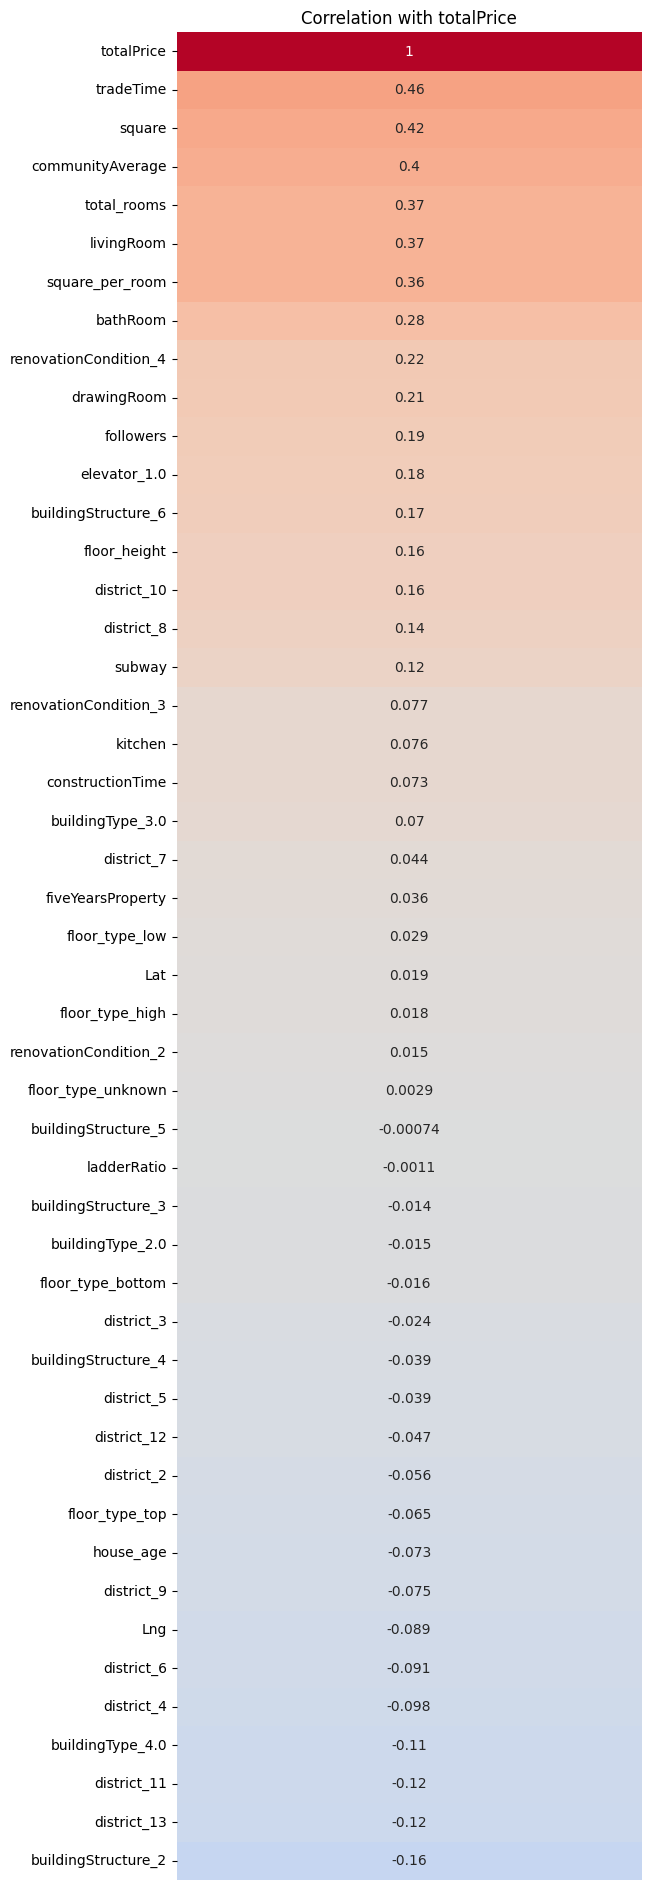

In [23]:
numeric_cols = df.select_dtypes(include=['number']).columns


corr_matrix = df[numeric_cols].corr()


corr_target = corr_matrix['totalPrice'].sort_values(ascending=False)


corr_with_target = pd.DataFrame(corr_target)

plt.figure(figsize=(6, len(corr_with_target)/2))  
sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
plt.title('Correlation with totalPrice')
plt.yticks(rotation=0)
plt.xticks([])  
plt.show()

In [24]:
df.describe(include='all')

,Lng,Lat,tradeTime,followers,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,...,district_13,elevator_1.0,floor_type_low,floor_type_bottom,floor_type_unknown,floor_type_top,floor_type_high,house_age,total_rooms,square_per_room
count,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,...,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000,283901.000000
mean,0.542672,0.515713,2014.742414,0.014596,314.666440,0.159446,0.245853,0.244528,0.331239,0.164950,...,0.031159,0.556479,0.199168,0.080859,0.003297,0.121821,0.218964,25.997513,0.986570,0.157490
std,0.176360,0.148571,1.659689,0.030155,149.120619,0.069396,0.092096,0.081481,0.033659,0.053937,...,0.173747,0.496801,0.399375,0.272619,0.057324,0.327079,0.413545,8.820368,0.187309,0.047175
min,0.000000,0.000000,2002.000000,0.000000,0.100000,0.000949,0.125000,0.200000,0.000000,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.467857,0.001776
25%,0.426675,0.423443,2013.000000,0.000000,201.000000,0.110650,0.125000,0.200000,0.333333,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.845718,0.122472
50%,0.538907,0.490697,2015.000000,0.004374,285.000000,0.142557,0.250000,0.200000,0.333333,0.142857,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.926190,0.153282
75%,0.634317,0.605344,2016.000000,0.015748,401.000000,0.194051,0.250000,0.244528,0.333333,0.142857,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,1.051190,0.188256
max,1.000000,1.000000,2018.000000,1.000000,762.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,2.788095,1.424990


## 📏 Scaling (Ma’lumotlarni normallashtirish)

### ⚙️ MinMaxScaler  
Sonli ustunlardagi qiymatlar **[0, 1]** oraliqqa o‘zgartiriladi.  
Bu modelni **tezroq va barqarorroq** o‘rganishga yordam beradi.  
Turli birlikdagi ustunlar **bir xil diapazonda** bo‘lishi ta'minlanadi.


In [25]:
"""
scaler = StandardScaler()

def scaling_qil(df):
    numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.drop('totalPrice')
    df[numerical_col] = scaler.fit_transform(df[numerical_col])
    return df
df=scaling_qil(df)
df.head()
"""


"\nscaler = StandardScaler()\n\ndef scaling_qil(df):\n    numerical_col = df.select_dtypes(include=['int64', 'float64']).columns.drop('totalPrice')\n    df[numerical_col] = scaler.fit_transform(df[numerical_col])\n    return df\ndf=scaling_qil(df)\ndf.head()\n"

- ✅ Avval **target taqsimotini tekshiramiz** — agar u **o‘ngga egilgan** bo‘lsa,

- 🔄 So‘ng **log transformatsiyani qo‘llaymiz** — bu taqsimotni yanada **simmetrik** va **normalga yaqinlashtiradi**,

- 🚀 Keyin **modelni log transformatsiyalangan target bilan qurish mumkin**.


--- totalPrice ustuni statistikalari ---
count    283901.000000
mean        314.666440
std         149.120619
min           0.100000
25%         201.000000
50%         285.000000
75%         401.000000
max         762.000000
Name: totalPrice, dtype: float64




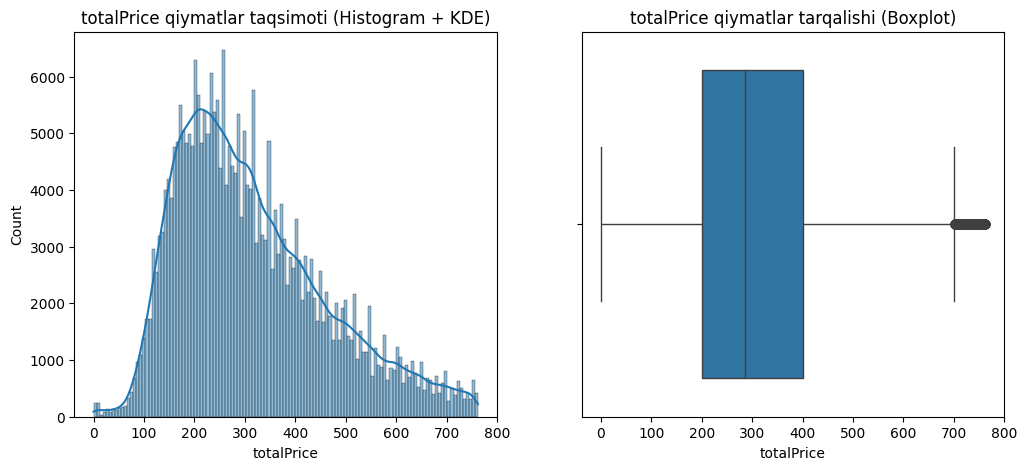

--- Log transformatsiyadan keyingi totalPrice_log ustuni statistikalari ---
count    283901.000000
mean          5.636183
std           0.521116
min           0.095310
25%           5.308268
50%           5.655992
75%           5.996452
max           6.637258
Name: totalPrice_log, dtype: float64




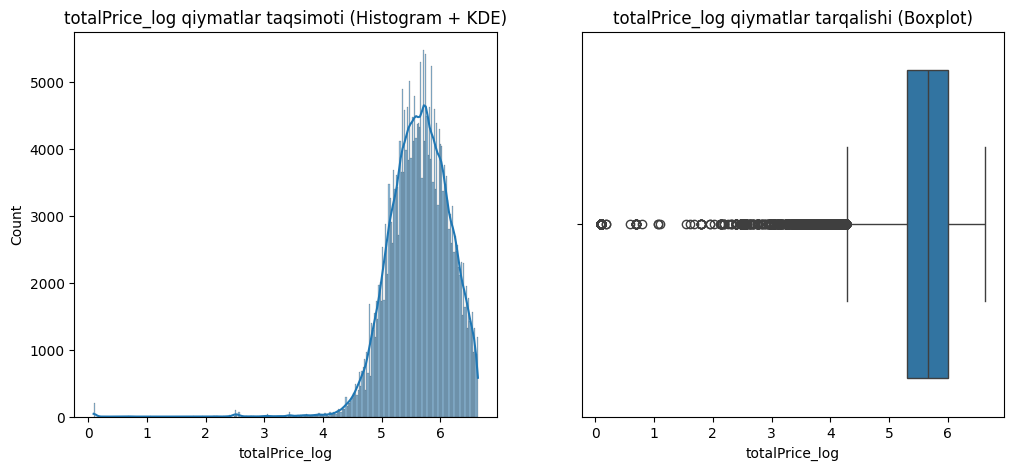

In [26]:

def target_distribution_check(df, target_col):
    print(f"--- {target_col} ustuni statistikalari ---")
    print(df[target_col].describe())
    print("\n")
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col], kde=True)
    plt.title(f'{target_col} qiymatlar taqsimoti (Histogram + KDE)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col])
    plt.title(f'{target_col} qiymatlar tarqalishi (Boxplot)')
    
    plt.show()

def log_transform_and_check(df, target_col):
    df[target_col + '_log'] = np.log1p(df[target_col])
    print(f"--- Log transformatsiyadan keyingi {target_col}_log ustuni statistikalari ---")
    print(df[target_col + '_log'].describe())
    print("\n")
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[target_col + '_log'], kde=True)
    plt.title(f'{target_col}_log qiymatlar taqsimoti (Histogram + KDE)')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[target_col + '_log'])
    plt.title(f'{target_col}_log qiymatlar tarqalishi (Boxplot)')
    
    plt.show()

# Ishga tushirish:
target_distribution_check(df, 'totalPrice')

# Agar kerak bo‘lsa log transformatsiyani tekshirish:
log_transform_and_check(df, 'totalPrice')


### 📊 Log transformatsiya haqida

✅ **Log transformatsiya** `totalPrice` ning **o‘ngga egilgan taqsimotini** deyarli **normal taqsimotga aylantirdi**.

🚀 Bu transformatsiya **regression modelingiz uchun foydali**, chunki ko‘pchilik regressiya usullari  
📈 **normal taqsimot farazini yaxshi bajaradigan ma’lumotlarda samaraliroq ishlaydi**.


In [ ]:
# --- 1. Log transform target ustunini qo'shish ---
df['totalPrice_log'] = np.log1p(df['totalPrice'])  # Narx ustunini log(1 + x) bilan transformatsiya qilib, tarqalishni kamaytirish

# --- 2. Target va feature-larni ajratish ---
target = 'totalPrice_log'  # Target ustun nomi (log-scale'da)
X = df.drop(columns=['totalPrice', 'totalPrice_log'])  # X — kiruvchi xususiyatlar (targetlar olib tashlanadi)
y = df[target]  # y — model bashorat qiladigan maqsadli ustun

# --- 3. Train-test ajratish ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Ma'lumotlarni 80% train va 20% testga ajratish

# --- 4. Raqamli ustunlarni tanlash (scaling uchun) ---
exclude_cols = ['totalPrice', 'totalPrice_log']  # Scalingga kiritilmasligi kerak bo'lgan ustunlar
numeric_cols = [col for col in X.select_dtypes(include=['int64', 'float64']).columns if col not in exclude_cols]  # Faqat raqamli ustunlarni tanlab olish

# --- 5. Scaler va ColumnTransformer tayyorlash ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)  # Raqamli ustunlarga StandardScaler qo'llash (o'rtacha=0, std=1)
], remainder='passthrough')  # Qolgan ustunlar o'zgarishsiz qoladi (categorical, text va h.k.)

# --- 6. Baholash funksiyasi ---
def evaluate(y_true, y_pred):  # Modelni 3 xil ko'rsatkich bilan baholash uchun funksiya
    return {
        'MAE': mean_absolute_error(y_true, y_pred),  # O'rtacha mutlaq xatolik
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),  # Kvadrat ildizli o'rtacha xatolik
        'R2': r2_score(y_true, y_pred)  # Determinatsiya koeffitsiyenti (R^2)
    }

# --- 7. Modellar ro'yxati ---
scaled_models = {  # Scaling talab qiladigan modellar
    'LinearRegression': LinearRegression(),  # Oddiy chiziqli regressiya
    'Ridge': Ridge(),  # Ridge regressiya (L2 regularizatsiya bilan)
    'Lasso': Lasso(),  # Lasso regressiya (L1 regularizatsiya bilan)
    'SVR': SVR(),  # Support Vector Regression
    'MLP': MLPRegressor(max_iter=300, random_state=42)  # Multi-Layer Perceptron
}

nonscaled_models = {  # Scaling talab qilmaydigan modellar (tree-based va boosting)
    'DecisionTree': DecisionTreeRegressor(random_state=42),  # Qaror daraxti regressori
    'RandomForest': RandomForestRegressor(n_estimators=50, random_state=42),  # O'rmon (50 daraxtli)
    'XGBoost': xgb.XGBRegressor(random_state=42, eval_metric='rmse'),  # XGBoost regressori (eval_metric rmse)
    'LightGBM': lgb.LGBMRegressor(random_state=42)  # LightGBM regressori
}

# --- 8. Natijalarni saqlash uchun dict ---
results = {}  # Har bir model uchun MAE, RMSE, R2 natijalarini saqlash

# --- 9. Scaler talab qiladigan modellar uchun pipeline bilan fit/predict ---
for name, model in scaled_models.items():  # Har bir scale talab qiladigan modelni aylanish
    pipe = Pipeline([
        ('scaler', scaler),  # Avval scaling (standartlashtirish)
        ('regressor', model)  # Keyin modelni fit qilish
    ])
    pipe.fit(X_train, y_train)  # Modelni o'rgatish
    y_pred_log = pipe.predict(X_test)  # Test ma'lumotlari uchun log-scale'dagi bashorat
    y_pred = np.expm1(y_pred_log)  # Bashoratlarni asl narxga qaytarish (log ni teskari)
    y_true = np.expm1(y_test)  # Haqiqiy qiymatlarni ham asl narxga qaytarish
    results[name] = evaluate(y_true, y_pred)  # Modelni baholab natijani dict ga yozish

# --- 10. Scaler talab qilmaydigan modellar ---
for name, model in nonscaled_models.items():  # Har bir tree-based modelni aylanish
    model.fit(X_train, y_train)  # Modelni o'rgatish
    y_pred_log = model.predict(X_test)  # Test ma'lumotlariga log-scale'da bashorat qilish
    y_pred = np.expm1(y_pred_log)  # Bashoratlarni asl qiymatga qaytarish
    y_true = np.expm1(y_test)  # Haqiqiy log qiymatni asl ko'rinishga qaytarish
    results[name] = evaluate(y_true, y_pred)  # Model natijasini hisoblab saqlash

# --- 11. Natijalarni DataFrame sifatida chiqarish ---
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)  # Natijalarni jadvalga aylantirish va R2 bo'yicha saralash
print("📊 Model baholash natijalari (log transform qilingan target bilan):")
print(results_df.round(4))  # Natijalarni 4 xonagacha yaxlitlab chop etish


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2075
[LightGBM] [Info] Number of data points in the train set: 227120, number of used features: 47
[LightGBM] [Info] Start training from score 5.636707
📊 Model baholash natijalari (log transform qilingan target bilan):
                       MAE      RMSE      R2
XGBoost            32.8152   47.8698  0.8977
RandomForest       31.7917   48.0161  0.8971
LightGBM           34.2661   49.2698  0.8916
SVR                34.9913   50.5268  0.8860
MLP                36.1440   52.0916  0.8788
DecisionTree       42.0093   63.5912  0.8194
Ridge              47.5294   80.6675  0.7094
LinearRegression   47.5294   80.6759  0.7094
Lasso             117.8437  153.6344 -0.0539


C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_20320\2472699690.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='MAE', data=results_df, palette='Blues_r')
C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_20320\2472699690.py:15: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erniyazov_sarvarbek\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


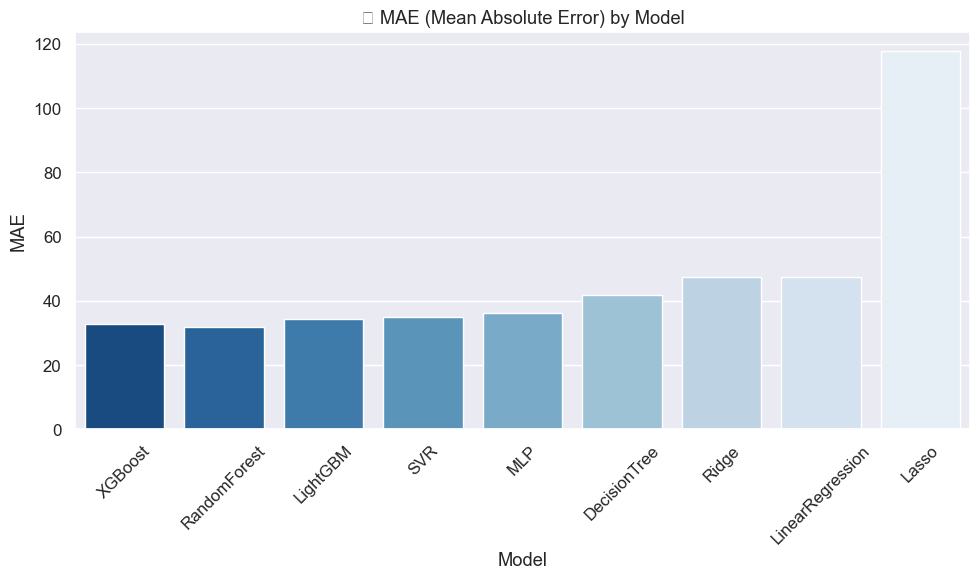

C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_20320\2472699690.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='RMSE', data=results_df, palette='Oranges_r')
C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_20320\2472699690.py:25: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erniyazov_sarvarbek\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


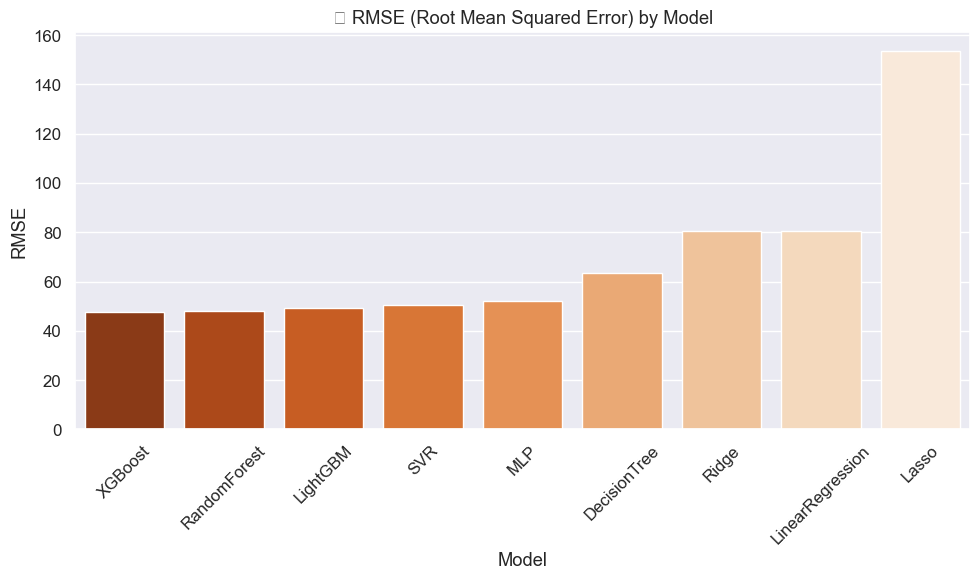

C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_20320\2472699690.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='R2', data=results_df, palette='Greens_r')
C:\Users\erniyazov_sarvarbek\AppData\Local\Temp\ipykernel_20320\2472699690.py:36: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\erniyazov_sarvarbek\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


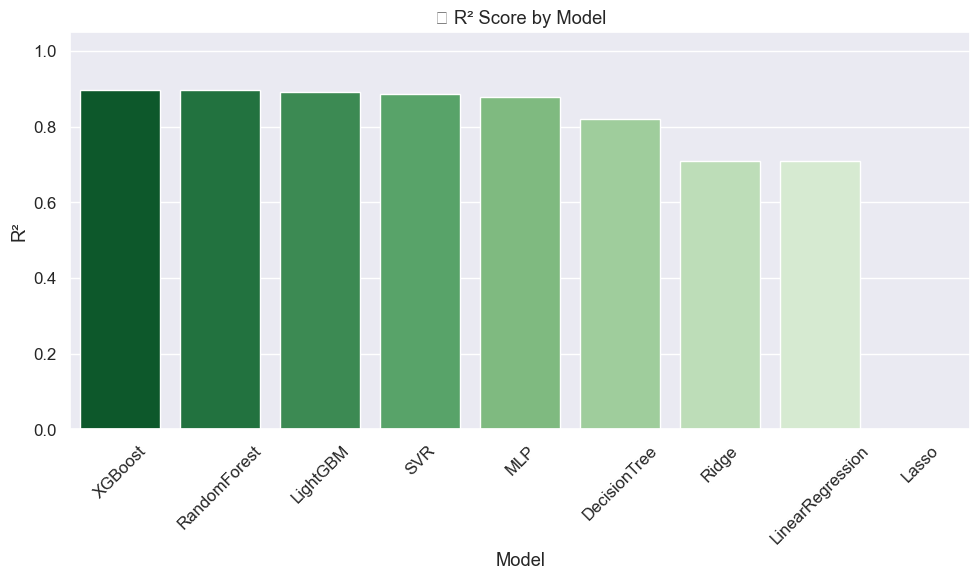

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stil sozlash
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.1)

# --- 1. MAE bo'yicha ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='MAE', data=results_df, palette='Blues_r')
plt.xticks(rotation=45)
plt.title('📉 MAE (Mean Absolute Error) by Model')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# --- 2. RMSE bo'yicha ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='RMSE', data=results_df, palette='Oranges_r')
plt.xticks(rotation=45)
plt.title('📉 RMSE (Root Mean Squared Error) by Model')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# --- 3. R² bo'yicha ---
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y='R2', data=results_df, palette='Greens_r')
plt.xticks(rotation=45)
plt.title('📈 R² Score by Model')
plt.ylabel('R²')
plt.xlabel('Model')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


### ✅ Umumiy Xulosa:

🔍 Model baholash natijalariga ko‘ra, **XGBoost** modeli **aniqlik (R²)** va **xatolikni kamaytirish (RMSE)** bo‘yicha eng yuqori natijalarni ko‘rsatdi.  
📌 Ammo **MAE** bo‘yicha esa **RandomForest** modeli biroz yaxshiroq ishladi.


In [29]:
print("\n🧠 Har bir metrika bo‘yicha eng yaxshi model:")
for metric in ['MAE', 'RMSE', 'R2']:
    if metric in ['MAE', 'RMSE']:  # Bu metrikalarda pastroq bo'lish yaxshi
        best = results_df[metric].idxmin()
    else:  # R2 - yuqoriroq bo'lishi yaxshi
        best = results_df[metric].idxmax()
    print(f"{metric} uchun eng yaxshi model: {best} -> {results_df.loc[best, metric]:.4f}")



🧠 Har bir metrika bo‘yicha eng yaxshi model:
MAE uchun eng yaxshi model: RandomForest -> 31.7917
RMSE uchun eng yaxshi model: XGBoost -> 47.8698
R2 uchun eng yaxshi model: XGBoost -> 0.8977


### 🔁 5-Fold Cross-Validation Natijalari:

- 📉 **RMSE (O‘rtacha)**: `47.4822 ± 0.3545`
- 📈 **MAE (O‘rtacha)**: `32.6212`
- 🧩 **R² (O‘rtacha)**: `0.8986`


In [ ]:

# --- Ma'lumot tayyorlash ---
# df o'zingizda allaqachon mavjud bo'lsin
df['totalPrice_log'] = np.log1p(df['totalPrice'])
target = 'totalPrice_log'
X = df.drop(columns=['totalPrice', 'totalPrice_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Baholash funksiyasi ---
def evaluate(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('xgb', xgb.XGBRegressor(random_state=42, eval_metric='rmse'))
])

# --- Cross-validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
mae_scores = []
r2_scores = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    pipeline.fit(X_train, y_train)
    y_pred_log = pipeline.predict(X_val)

    # Asl qiymatlarga qaytarish
    y_val_orig = np.expm1(y_val)
    y_pred_orig = np.expm1(y_pred_log)

    scores = evaluate(y_val_orig, y_pred_orig)
    rmse_scores.append(scores['RMSE'])
    mae_scores.append(scores['MAE'])
    r2_scores.append(scores['R2'])

print(f"Cross-validation natijalari (5-fold):")
print(f"RMSE o'rtacha: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
print(f"MAE o'rtacha: {np.mean(mae_scores):.4f}")
print(f"R2 o'rtacha: {np.mean(r2_scores):.4f}")


Cross-validation natijalari (5-fold):
RMSE o'rtacha: 47.4822 ± 0.3545
MAE o'rtacha: 32.6212
R2 o'rtacha: 0.8986


### ✅ GridSearchCV Natijalari

- 162 ta parametr kombinatsiyasi 5-fold CV bilan sinovdan o'tkazildi.
- **Eng yaxshi parametrlar**:
  - `colsample_bytree`: 0.8
  - `learning_rate`: 0.1
  - `max_depth`: 7
  - `n_estimators`: 200
  - `subsample`: 1
- **Eng yaxshi R²**: 0.8150

⚠️  R² oldingi natijadan (≈0.8986) pastroq chiqdi!


In [ ]:


# --- Ma'lumot tayyorlash ---
df['totalPrice_log'] = np.log1p(df['totalPrice'])
target = 'totalPrice_log'
X = df.drop(columns=['totalPrice', 'totalPrice_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('xgb', xgb.XGBRegressor(random_state=42, eval_metric='rmse'))
])

# --- Custom scorer (asl qiymatda R2) ---
def r2_exp(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return r2_score(y_true, y_pred)

r2_scorer = make_scorer(r2_exp, greater_is_better=True)

# --- Parametrlar gridi ---
param_grid = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [4, 6, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.6, 0.7, 0.8]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring=r2_scorer,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print("GridSearchCV eng yaxshi parametrlar:", grid_search.best_params_)
print(f"GridSearchCV eng yaxshi R2: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
GridSearchCV eng yaxshi parametrlar: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__n_estimators': 200, 'xgb__subsample': 1}
GridSearchCV eng yaxshi R2: 0.8150


### ✅ RandomizedSearchCV Natijalari

- 30 ta parametr kombinatsiyasi 5-fold CV bilan sinovdan o'tkazildi.
- **Eng yaxshi parametrlar**:
  - `colsample_bytree`: 0.6974
  - `learning_rate`: 0.0687
  - `max_depth`: 9
  - `n_estimators`: 188
  - `subsample`: 0.7597
- **Eng yaxshi R²**: 0.8138

⚠️Bu R² oldingi oddiy va GridSearchCV natijalariga o‘xshash.


In [ ]:

from scipy.stats import uniform, randint



# --- Ma'lumot tayyorlash ---
df['totalPrice_log'] = np.log1p(df['totalPrice'])
target = 'totalPrice_log'
X = df.drop(columns=['totalPrice', 'totalPrice_log'])
y = df[target]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pipeline ---
scaler = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols)
], remainder='passthrough')

pipeline = Pipeline([
    ('scaler', scaler),
    ('xgb', xgb.XGBRegressor(random_state=42, eval_metric='rmse'))
])

# --- Custom scorer (asl qiymatda R2) ---
def r2_exp(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return r2_score(y_true, y_pred)

r2_scorer = make_scorer(r2_exp, greater_is_better=True)

# --- Parametrlar taqsimoti ---
param_dist = {
    'xgb__n_estimators': randint(50, 200),
    'xgb__max_depth': randint(3, 10),
    'xgb__learning_rate': uniform(0.01, 0.2),
    'xgb__subsample': uniform(0.7, 0.3),
    'xgb__colsample_bytree': uniform(0.5, 0.5)
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring=r2_scorer,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X, y)

print("RandomizedSearchCV eng yaxshi parametrlar:", random_search.best_params_)
print(f"RandomizedSearchCV eng yaxshi R2: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
RandomizedSearchCV eng yaxshi parametrlar: {'xgb__colsample_bytree': 0.6974407590877849, 'xgb__learning_rate': 0.06869763494360763, 'xgb__max_depth': 9, 'xgb__n_estimators': 188, 'xgb__subsample': 0.7596527212266415}
RandomizedSearchCV eng yaxshi R2: 0.8138


# SHAP nima uchun foydalaniladi?

- 🧠 **Modelni tushunish**  
  Murakkab modellarning  qaror qabul qilish jarayonini aniqlash.

- 🔍 **Feature Importance**  
  Har bir kiruvchi o‘zgaruvchining model natijasiga ta’sirini aniqlash.

- 🔄 **Individual bashoratni izohlash**  
  Modelning har bir prediktsiyasini nima uchun shunday qilganini ko‘rsatish.

- 🔐 **Ishonchlilikni oshirish**  
  Foydalanuvchilar va mutaxassislarga model qarorlarini tushuntirish orqali ishonchni kuchaytirish.

- 🛠️ **Model diagnostikasi**  
  Modeldagi muammolarni aniqlash va yaxshilash uchun yordam beradi.


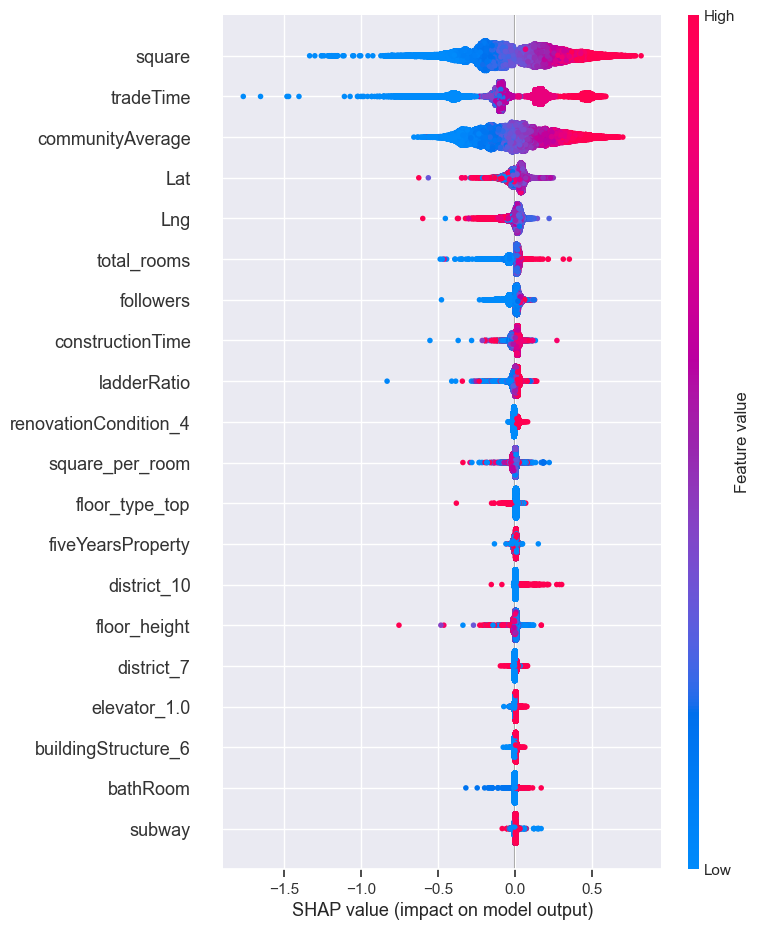

In [53]:
import shap
import xgboost as xgb

# Modelni o'qitamiz
model = xgb.XGBRegressor().fit(X_train, y_train)

# SHAP explainer tayyorlash
explainer = shap.Explainer(model)

# Test ma'lumotlari uchun SHAP qiymatlarni hisoblash
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)


In [54]:
import joblib

# Eng yaxshi modelni olish
best_model = random_search.best_estimator_

# Modelni faylga saqlash
joblib.dump(best_model, 'best_xgb_model.joblib')
print("Model 'best_xgb_model.joblib' nomli faylga saqlandi.")


Model 'best_xgb_model.joblib' nomli faylga saqlandi.
